# Dataset
In this tutorial, we will practice the Logistic Regression classifier in diabetes analysis.

The dataset we use is Pima Indian Diabeters dataset. You can download data from the following link:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

Diabetes is a major problem in India. From 1971 to 2000, the number of diabetes incidence increased 10 times from 1.2% to 12.1%. As an estimation, in 2011, there are about 61.3 million people in the age of between 20 and 79 years living with diabetes. The estimation also predict that by 2030 this number will be close to 101,2 million people. Moreover, there are 77.2 million people reported to have prediabetes. In 2012, nearly 1 million people died due to diabetes. About 25 percent of citizens living in Chennai’s urban slums are affected by diabetes. This number is nearly 7 per cent by three times of the national average. About 33 percent of the deaths in India involve people under 60 years old with non-communicable diseases. On average, Indian people suffer from diabetes 10 years before their Western countries. Changes in lifestyle lead to physical decreases Increased fat, sugar and activities activity calories and higher insulin cortisol levels Obesity and vulnerability. In 2011, India paid around $38 billion annually for dealing with diabetes problem.

For further information, please find in this article:

http://www.arogyaworld.org/wp-content/uploads/2010/10/ArogyaWorld_IndiaDiabetes_FactSheets_CGI2013_web.pdf

# Dataset description

This dataset comes from the Diabetes and Digestive and Kidney Disease National Institutes. The purpose of this dataset is to diagnose whether or not a patient is diabetes, on the basis of certain diagnostic measures in the dataset. The selection of these instances from a larger database was subject to several restrictions. All patients are women from the Indian heritage of Pima, at least 21 years old.

The data sets comprise several variables of the medical predictor, and one objective variable, Outcome. The forecasting variables include the patient’s number of pregnancies, BMI levels, insulin levels, age, etc.

# Diabetes Data Analysis

## Import and Loading dataset

In [1]:
import pandas as pd

In [2]:
# load dataset
diabetes_dataset = pd.read_csv("diabetes.csv", sep = ",")

In [3]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_dataset.shape

(768, 9)

## Explore of the data

In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Further analysis

Investigating the correlation between features.

- A large positive value (near to 1.0) indicates a strong positive correlation, i.e., if the value of one of the variables increases, the value of the other variable increases as well.
- A large negative value (near to -1.0) indicates a negative correlation, i.e., the value of one variable decreases with the other’s increasing and vice-versa.
- A value near to 0 (both positive or negative) indicates no correlation between the two variables, and hence those variables are independent of each other.

In [5]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


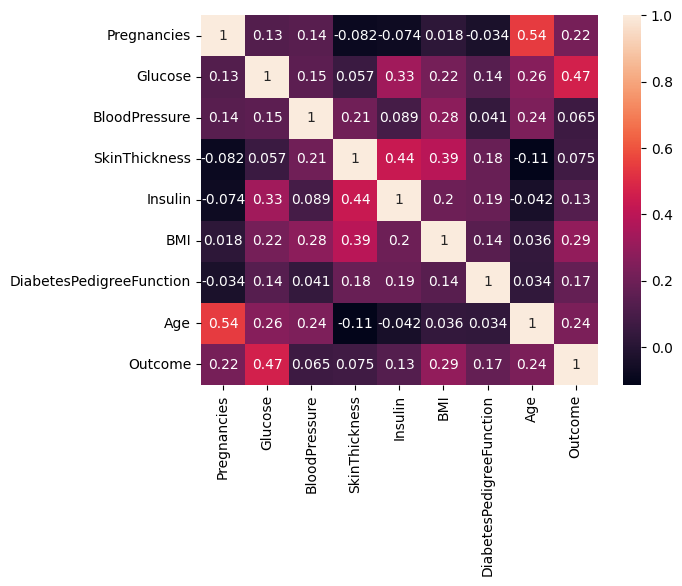

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(diabetes_dataset.corr(), annot=True)
plt.show()

From the heat map, it can be said that the diabetes outcome is dependent at most on Glucose, and at least on Blood Pressure and Skin Thickness.

As shown in the heat map, some of these features are highly correlated, e.g. Pregnancies and Age are highly correlated as they have coefficient that is high. Also, Insulin and SkinThickness are in a high correlation. The high correlation between features has implied to the results of the regression model that is based on the linear relationship between features.

# Diabetes Classification from Logistic Regression

## Feature Extraction

Here, you need to divide the given columns into a target or a dependent variable and feature vectors or independent variables.

In [7]:
#Extract features and a target
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_dataset[feature_columns] # Features
y = diabetes_dataset.Outcome # Target

## Splitting the Dataset

To understand model performance, the dataset is splitted into a training set and a test set with a ratio 3:1.

In [8]:
# split X and y into training and testing datasets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
X_train.shape
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [17]:
y_train.shape
y_train.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64

## Build a Logistic Regression model and make a prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lr = LogisticRegression(C = 10)

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
# fit the model with the training data
lr.fit(X_train,y_train)

# Make a prediction for the testing data
y_pred=lr.predict(X_test)

## Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [20]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import classification_report

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[120  10]
 [ 25  37]]


Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, recall and F1-score.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.8072916666666666
Precision: 0.8030157128882367
Recall: 0.8072916666666666
F1-score: 0.7992876007784263


Well, you got a classification rate of 81%, considered as good accuracy with 576 instances to train with.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 80% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 81% of the time.

## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

auc

np.float64(0.7599255583126551)

AUC score for the case is nearly 75%. AUC score 1 represents perfect classifier, and 50% represents a worthless classifier. Now we plot the ROC curve.

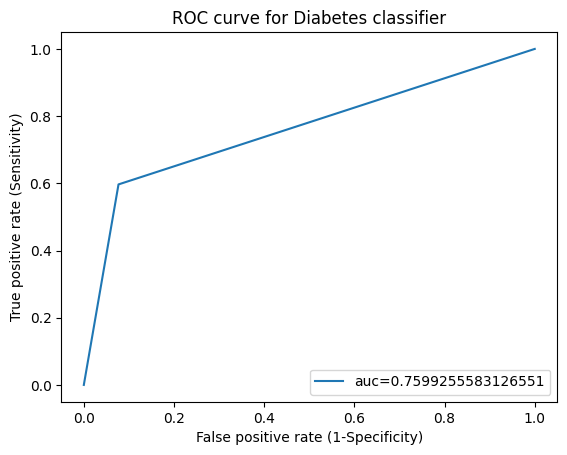

In [22]:
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc=4)
plt.show()

Display Misclassified rows with Predicted Labels

In [23]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

In [24]:
import numpy as np

np.array(misclassifiedIndexes).T

array([ 21,  27,  36,  39,  47,  48,  49,  57,  58,  59,  73,  77,  86,
        94,  96,  99, 104, 105, 111, 113, 117, 127, 135, 137, 141, 144,
       149, 156, 164, 165, 172, 173, 180, 187, 188])

## Find C to maximum the F1-score

In [25]:
def linear_regression(c):
    lr = LogisticRegression(C = c, max_iter = 1000)
    fit_lr = lr.fit(X_train, y_train)
    predicted_lr = fit_lr.predict(X_test)
    cm_lr = metrics.confusion_matrix(y_test, predicted_lr)

    f1_sc = metrics.f1_score(y_test, predicted_lr, average = 'weighted')
    return f1_sc

In [26]:
c = 0.0001
c_values = []
f1_values = []

while c < 1000:
    f1_sc = linear_regression(c)
    c_values.append(c)
    f1_values.append(f1_sc)
    c = c*10

f1_lr = pd.DataFrame({
    "c": c_values,
    "f1": f1_values
})

In [27]:
f1_lr[f1_lr['f1'] == f1_lr['f1'].max()].c

5     10.0
6    100.0
Name: c, dtype: float64

In [28]:
f1_lr.sort_values('f1',ascending=False)

,c,f1
6,100.0000,0.794545
5,10.0000,0.794545
4,1.0000,0.789817
3,0.1000,0.789817
2,0.0100,0.785102
1,0.0010,0.777589
0,0.0001,0.741396
